In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from salishsea_tools import viz_tools, places, visualisations
from matplotlib import pyplot as plt, dates
from datetime import datetime, timedelta
from calendar import month_name
from scipy.io import loadmat
from tqdm.notebook import tqdm
from salishsea_tools import nc_tools
from dask.diagnostics import ProgressBar
import cmocean

%matplotlib inline

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 'medium'})

In [4]:
df = pd.read_csv('/ocean/ksuchy/MOAD/observe/NPGO.csv', index_col=0)

In [5]:
df.index.name = "YEAR"
df = df.apply(pd.to_numeric) # convert all columns of DataFrame
df = df[:-1]

In [6]:
df.loc[2007:2020]

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,
2007,-0.240000,-0.730000,-0.180000,0.380000,0.140000,1.230000,1.230000,1.430000,0.110000,1.27,0.14,0.22
2008,0.180000,1.140000,1.370000,1.400000,1.740000,1.280000,1.430000,2.140000,2.230000,1.77,1.97,0.23
2009,0.140000,0.110000,0.300000,0.240000,0.180000,0.270000,0.180000,0.140000,0.100000,1.15,1.05,1.06
2010,2.060000,1.840000,1.650000,1.180000,1.870000,1.240000,1.150000,1.080000,1.000000,1.61,0.10,0.13
2011,0.310000,0.180000,1.200000,0.170000,1.390000,1.110000,1.040000,1.040000,1.330000,1.20,0.27,0.76
2012,0.120000,0.120000,1.120000,1.930000,1.630000,1.940000,1.860000,1.730000,1.360000,1.87,1.40,1.20
2013,1.230000,1.200000,0.160000,0.210000,0.120000,0.140000,0.220000,0.200000,0.260000,-0.68,-0.12,-1.45
2014,-0.260000,-0.370000,-0.220000,-0.160000,0.440000,-0.240000,-0.750000,-0.180000,-0.130000,0.24,0.32,-0.28
2015,-0.180000,-1.270000,-1.400000,-1.380000,-0.140000,-1.250000,-1.470000,-1.930000,-2.100000,-1.31,-2.25,-1.11


In [7]:
NPGO = df.loc[2007:2020].to_numpy().flatten()

In [8]:
df2 = pd.read_csv('/ocean/ksuchy/MOAD/observe/CentralSoG_NitrateAnomalies.csv', index_col=0)

In [9]:
df2.index.name = "YEAR"
df2 = df2.apply(pd.to_numeric) # convert all columns of DataFrame


In [10]:
df2

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
YEAR,,,,,,,,,,,,
2007,0.564286,1.064286,1.585714,1.692857,0.678571,-0.057143,1.3,-0.657143,0.257143,1.071429,0.628571,0.892857
2008,0.964286,0.664286,0.985714,-0.307143,1.878571,0.442857,0.2,1.842857,1.857143,-0.128571,0.728571,0.592857
2009,0.764286,0.764286,1.485714,3.192857,1.378571,0.842857,0.8,0.042857,-0.842857,0.571429,1.928571,1.192857
2010,0.864286,0.964286,1.085714,1.092857,0.278571,0.442857,1.5,1.542857,0.457143,0.571429,0.028571,0.492857
2011,0.464286,0.464286,1.285714,5.392857,2.378571,-0.657143,-1.0,-0.557143,0.757143,-0.228571,0.028571,0.492857
2012,0.564286,0.664286,1.885714,2.792857,0.478571,2.142857,0.5,-0.257143,-0.342857,0.771429,0.828571,1.092857
2013,0.364286,0.264286,0.685714,-0.907143,0.478571,0.042857,-0.2,0.942857,0.657143,0.071429,-0.371429,-0.307143
2014,0.164286,0.164286,-0.414286,-1.507143,-1.421429,-0.357143,0.0,-0.257143,-0.942857,-0.228571,-1.171429,-1.307143
2015,-1.635714,-1.135714,-3.514286,-3.607143,-0.621429,0.142857,0.9,2.342857,2.157143,0.571429,-0.171429,-0.107143


In [11]:
Nitrate_Anom=df2.to_numpy().flatten()

In [12]:
Nitrate_Anom

array([ 0.56428571,  1.06428571,  1.58571429,  1.69285714,  0.67857143,
       -0.05714286,  1.3       , -0.65714286,  0.25714286,  1.07142857,
        0.62857143,  0.89285714,  0.96428571,  0.66428571,  0.98571429,
       -0.30714286,  1.87857143,  0.44285714,  0.2       ,  1.84285714,
        1.85714286, -0.12857143,  0.72857143,  0.59285714,  0.76428571,
        0.76428571,  1.48571429,  3.19285714,  1.37857143,  0.84285714,
        0.8       ,  0.04285714, -0.84285714,  0.57142857,  1.92857143,
        1.19285714,  0.86428571,  0.96428571,  1.08571429,  1.09285714,
        0.27857143,  0.44285714,  1.5       ,  1.54285714,  0.45714286,
        0.57142857,  0.02857143,  0.49285714,  0.46428571,  0.46428571,
        1.28571429,  5.39285714,  2.37857143, -0.65714286, -1.        ,
       -0.55714286,  0.75714286, -0.22857143,  0.02857143,  0.49285714,
        0.56428571,  0.66428571,  1.88571429,  2.79285714,  0.47857143,
        2.14285714,  0.5       , -0.25714286, -0.34285714,  0.77

In [13]:
Nitrate_Anom.max()

5.392857143

In [14]:
date = []
for year in range(2007, 2021):
    for month in range(1, 13):
        index = df.index == str(year)
        date.append(datetime(year, month, 1))
        
        

date = np.array(date)
#NPGO = df.loc[2007:2020].to_numpy().flatten()
#Nitrate_Anom = df2.to_numpy().flatten()

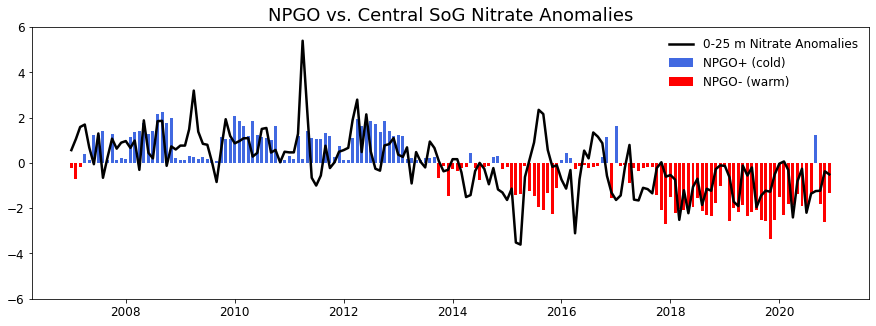

In [30]:
fig, ax = plt.subplots(figsize=(15, 5))


ax.bar(date[NPGO>0], NPGO[NPGO>0], width=20, color='royalblue',label='NPGO+ (cold)')
ax.bar(date[NPGO<0], NPGO[NPGO<0], width=20, color='r',label='NPGO- (warm)')
ax.set_ylim(-6,6)
ax.plot(date,Nitrate_Anom,color='k',linewidth=2.5,label='0-25 m Nitrate Anomalies')
ax.set_title('NPGO vs. Central SoG Nitrate Anomalies',fontsize=18)
ax.legend(frameon=False,loc=1)